In [1]:
!pip install stable_baselines3

In [2]:
import csv
from stable_baselines3 import PPO
import sinergym 
from sinergym.utils.wrappers import (LoggerWrapper, NormalizeAction,
                                     NormalizeObservation)

import gymnasium as gym
import numpy as np

2024-03-01 15:51:04.471277: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-01 15:51:04.674339: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-01 15:51:04.674374: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-01 15:51:04.703888: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-01 15:51:04.774149: I tensorflow/core/platform/cpu_feature_guar

In [3]:
TOTAL_TIMESTEP_5ZONE=2500

EPISODES=1

# 5Zone

In [5]:
expert_observations=[]
expert_actions=[]
expert_next_observations=[]
expert_rewards=[]
expert_n_trayectoria=[]

env = gym.make('Eplus-5zone-hot-discrete-v1')
env = NormalizeObservation(env)
env = LoggerWrapper(env)

# Definimos el modelo experto
ppo=PPO(policy="MlpPolicy", env=env, verbose=0)
ppo.learn(total_timesteps=TOTAL_TIMESTEP_5ZONE)



expert_observations = 'observations_5zone.csv'
expert_actions = 'actions_5zone.csv'
expert_next_observations='next_observations_5zone.csv'
expert_rewards='rewards_5zone.csv'

with open(expert_observations, 'w', newline='') as expert_observations_csv:
    # Crear el escritor CSV
    escritor_csv_obs=csv.writer(expert_observations_csv)
    with open(expert_actions, 'w', newline='') as expert_actions_csv:
        escritor_csv_act=csv.writer(expert_actions_csv)
        with open(expert_next_observations, 'w', newline='') as expert_next_observations_csv:
            escritor_csv_next_obs=csv.writer(expert_next_observations_csv)
            with open(expert_rewards, 'w', newline='') as expert_rewards_csv:
                escritor_csv_reward=csv.writer(expert_rewards_csv)
                for i in range(EPISODES):
                    obs, info = env.reset()
                    terminated = False
                    truncated=False
                    while not terminated and not truncated:
                        a, _ = ppo.predict(obs)
                        obs2, reward, terminated, truncated, info = env.step(a)

                        escritor_csv_obs.writerow(obs)

                        escritor_csv_act.writerow([a])
                        escritor_csv_next_obs.writerow(obs2)
                        escritor_csv_reward.writerow([reward])
                        obs=obs2

ppo.save('model5zone')
env.close()

#==============================================================================================#
#==============================================================================================#
#----------------------------------------------------------------------------------------------#
#----------------------------------------------------------------------------------------------#


/usr/local/lib/python3.10/dist-packages/gymnasium/spaces/box.py:240: UserWarning: WARN: Casting input x to numpy array.
  gym.logger.warn("Casting input x to numpy array.")


Progress: |****************************************************************************************************| 100%
#----------------------------------------------------------------------------------------------#
#----------------------------------------------------------------------------------------------#


/usr/local/lib/python3.10/dist-packages/gymnasium/spaces/box.py:240: UserWarning: WARN: Casting input x to numpy array.
  gym.logger.warn("Casting input x to numpy array.")


Progress: |****************************************************************************************************| 100%


   -0.9113706941918822
0            -0.787733
1            -0.834754
2            -0.744384
3            -0.776786
4            -0.857600


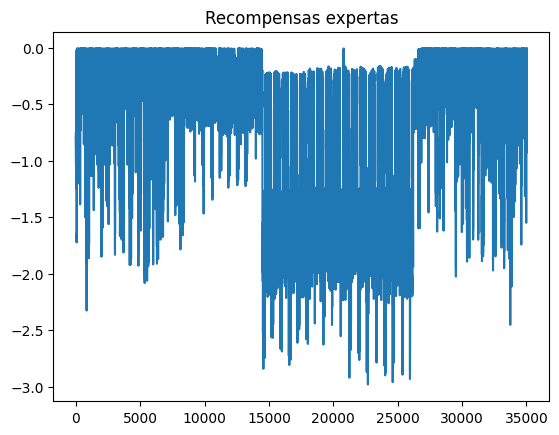

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Lee el archivo CSV
df = pd.read_csv('rewards_5zone.csv')


print(df.head())

plt.plot(df)
plt.title('Recompensas expertas')
plt.show()

In [11]:
print(df.shape[0])

35039
